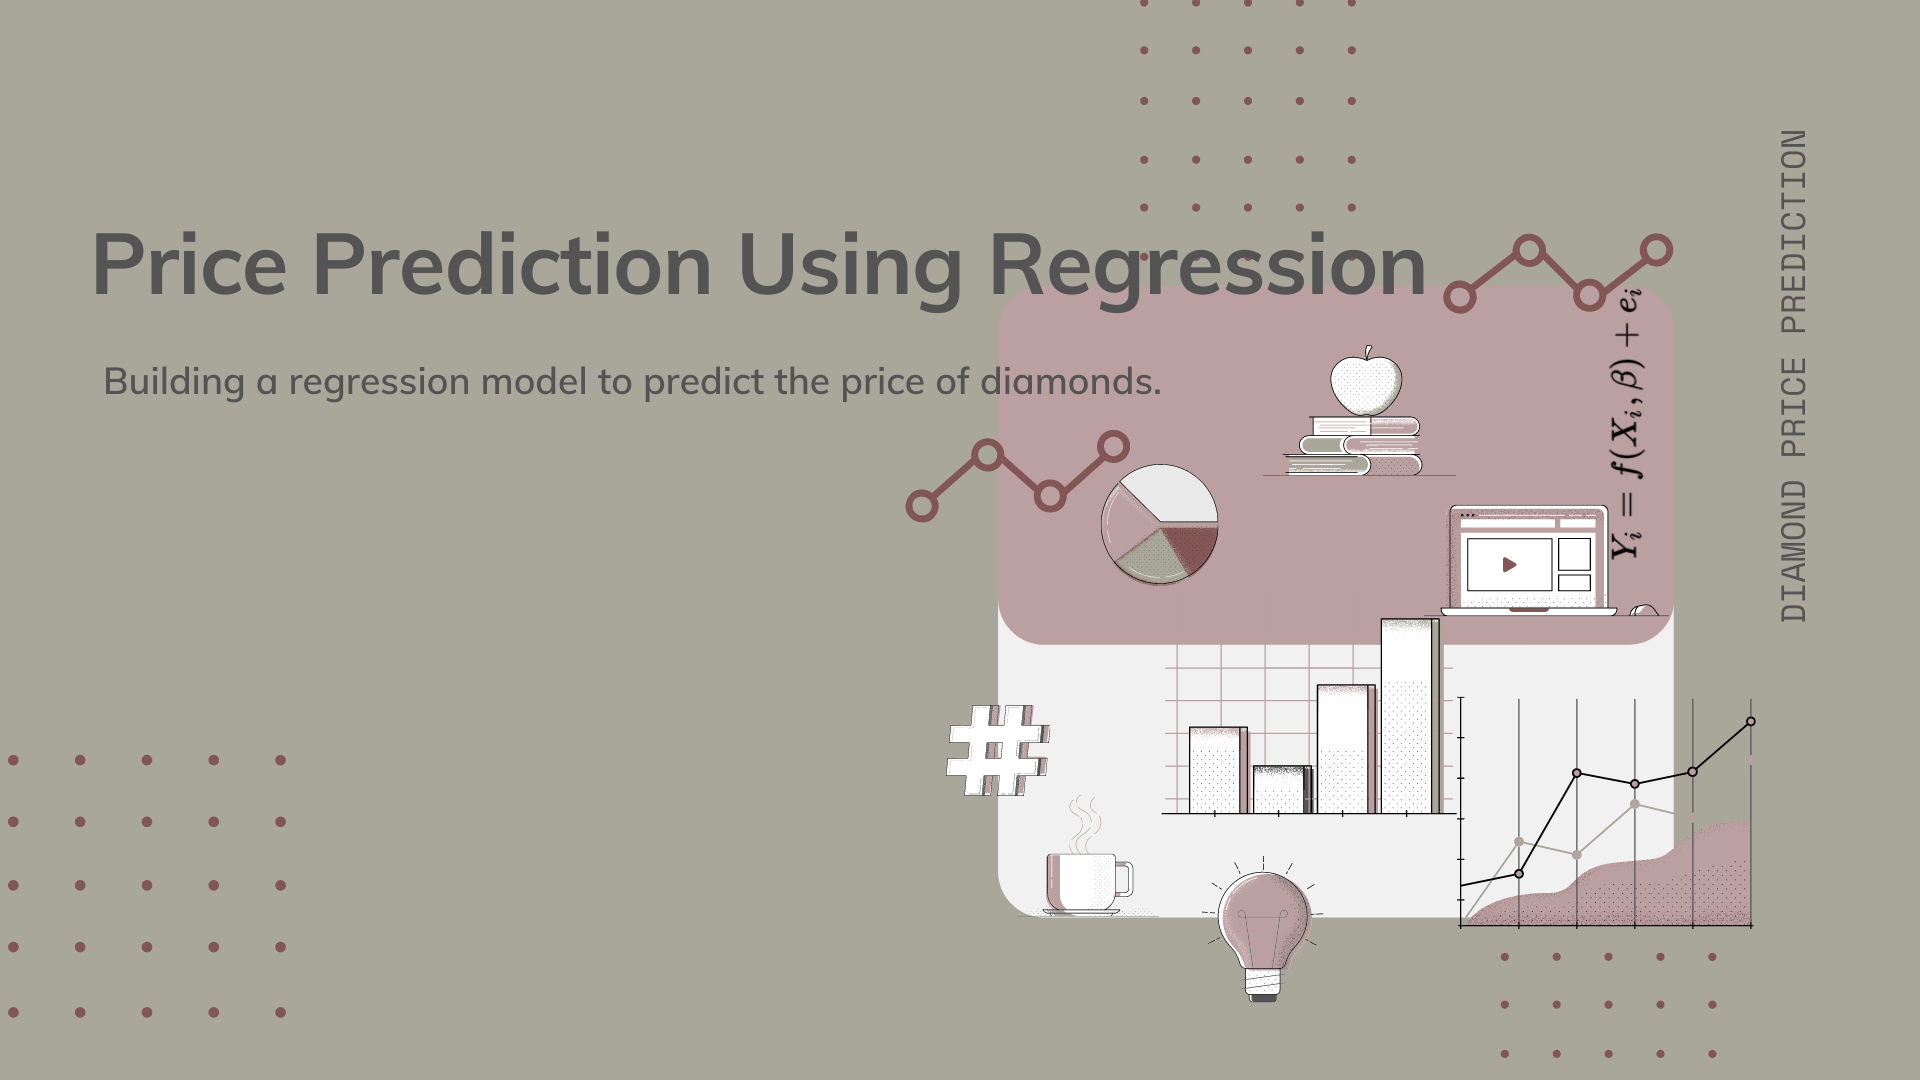

# Loading Data

This classic dataset contains the prices and other attributes of diamonds. There are 10 attributes included in the dataset including the target ie. price.

# Feature description:

Price in US dollars ($326--$18,823). This is the target column containing tags for the features. 

# The 4 Cs of Diamonds:-

- carat (0.2-3.5) - The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

- cut (Fair, Good, Very Good, Premium, Ideal) - In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

- color, from J (worst) to D (best)  - The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

- clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) - Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

# Dimensions

- x length in mm (0--10.74)

- y width in mm (0--58.9)

- z depth in mm (0--31.8)

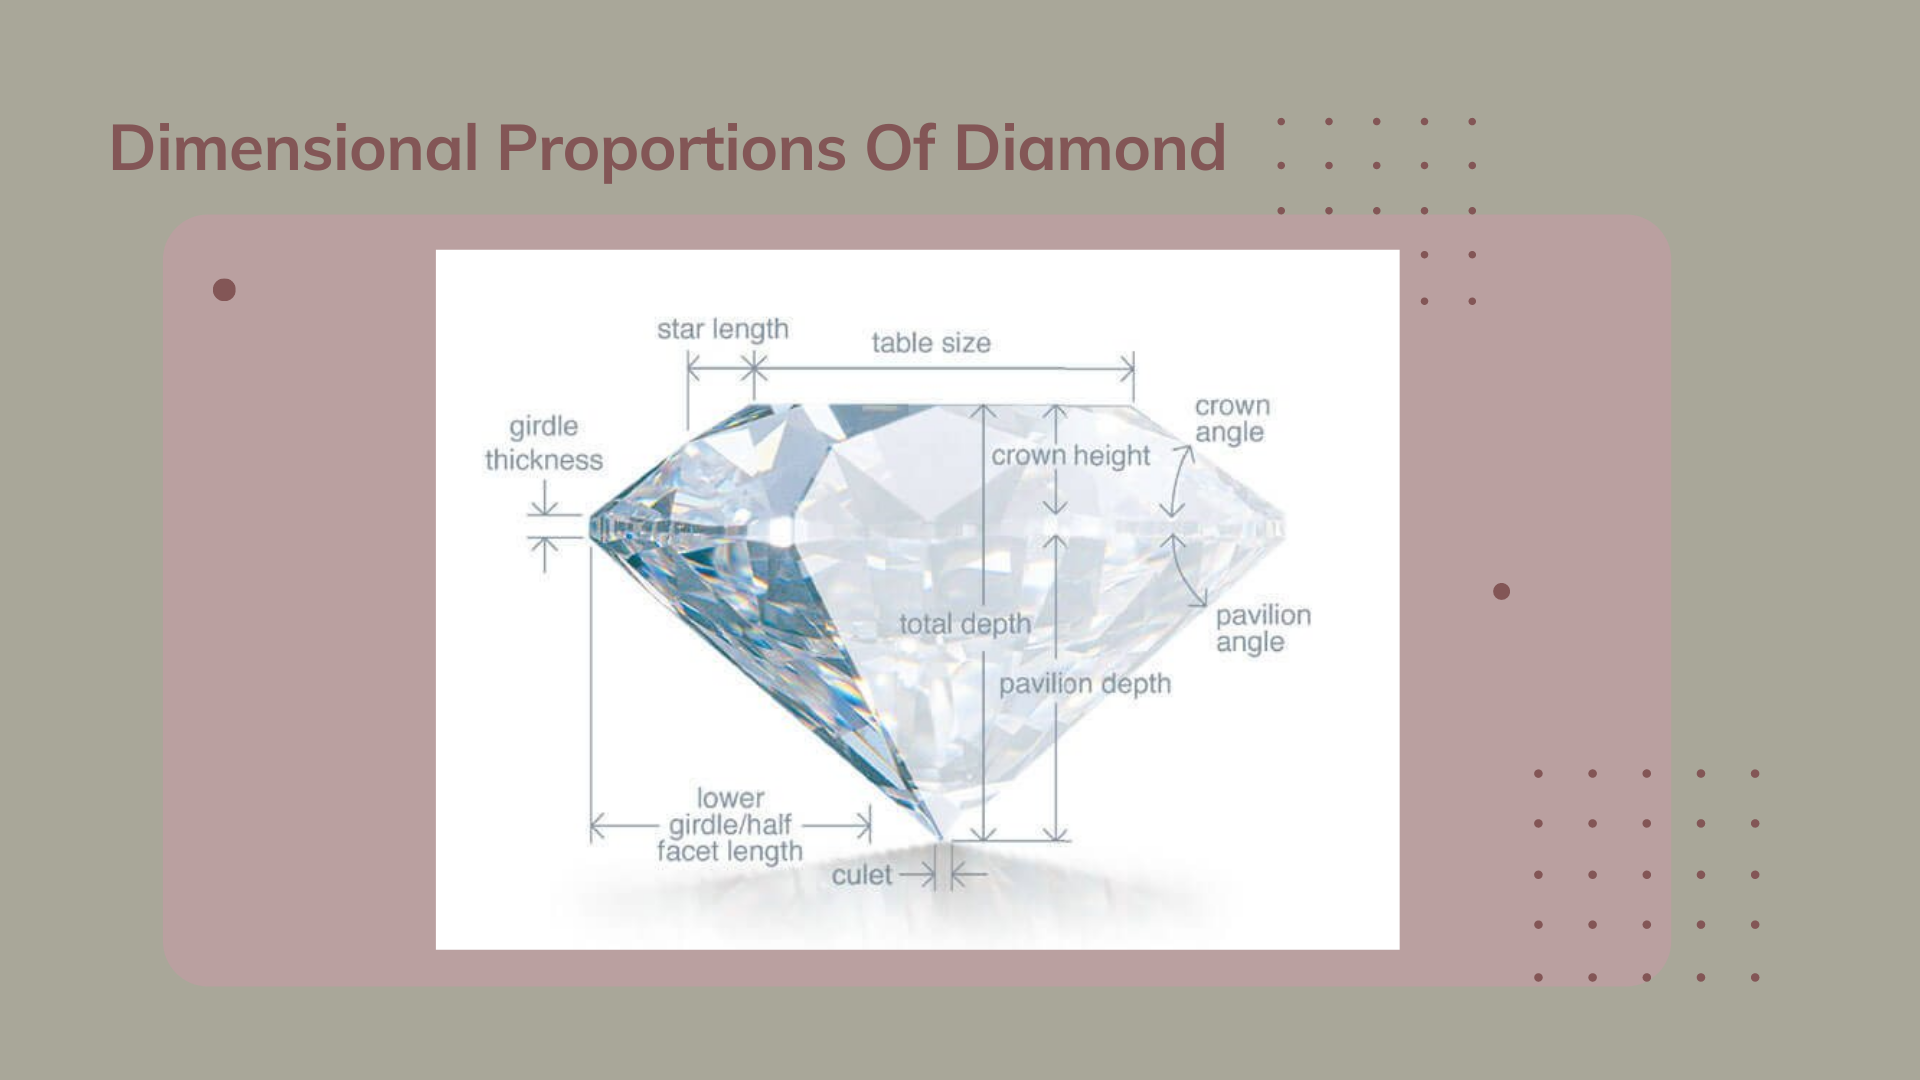

The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

total depth percentage = z / mean(x, y) 





A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

In [6]:
import pandas

### Loading the Data

In [7]:
df = pd.DataFrame(pd.read_csv("data/gemstone.csv"))
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Descriptive Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


### Checking for Null Values

In [9]:
df.isnull().value_counts()

id     carat  cut    color  clarity  depth  table  x      y      z      price
False  False  False  False  False    False  False  False  False  False  False    193573
Name: count, dtype: int64

In [10]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Inference

- No missing values present in the dataset
- The size of the dataset is 193573 rows and 11 columns
- Cut, color, clarity are categorical variables i.e., object data type
- Rest all features are numerical

In [11]:
df.drop(columns = 'id', axis = 1, inplace = True) #This can be considered as feature engineering (feature elimination)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Checking for duplicates

In [14]:
df.duplicated().sum()  #Checking for duplicates, if present we would drop them

np.int64(0)

### Segregating the dataset into numerical and categorical datatypes

In [15]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print(f"Numerical columns: {numerical_columns}\nCategorical columns: {categorical_columns}")

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


### Analysis of the categorical columns

In [16]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [17]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [18]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [19]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

### Data Distribution of Numerical Columns

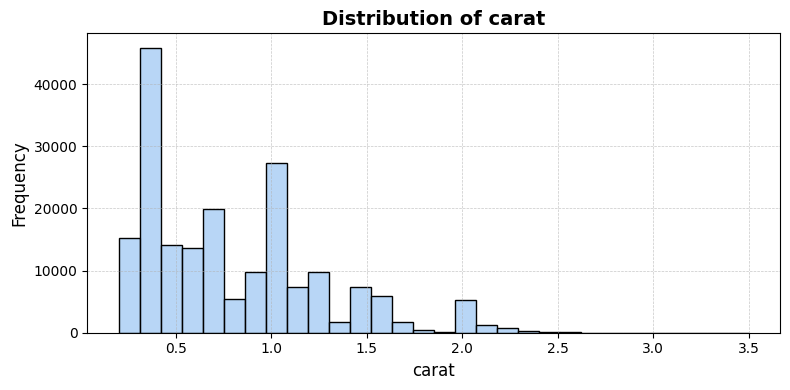

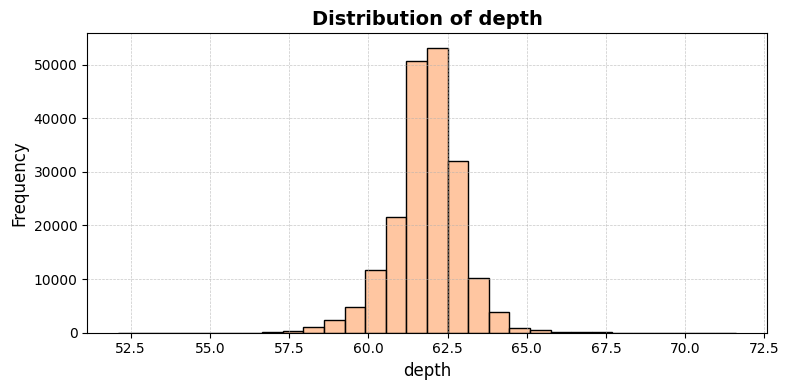

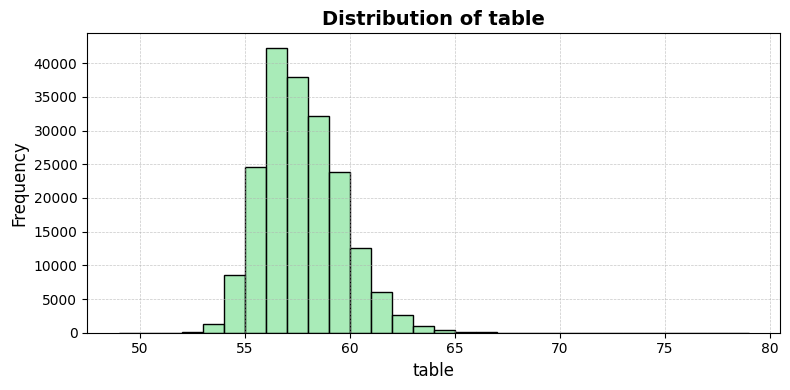

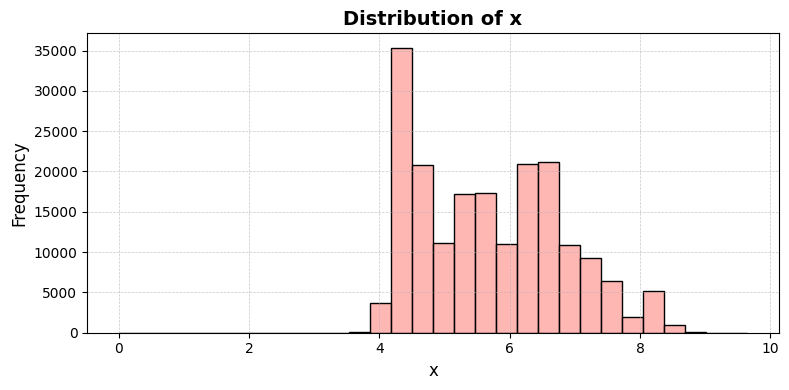

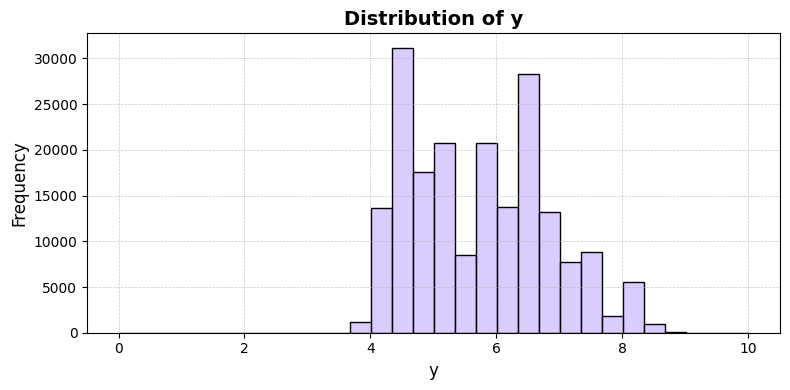

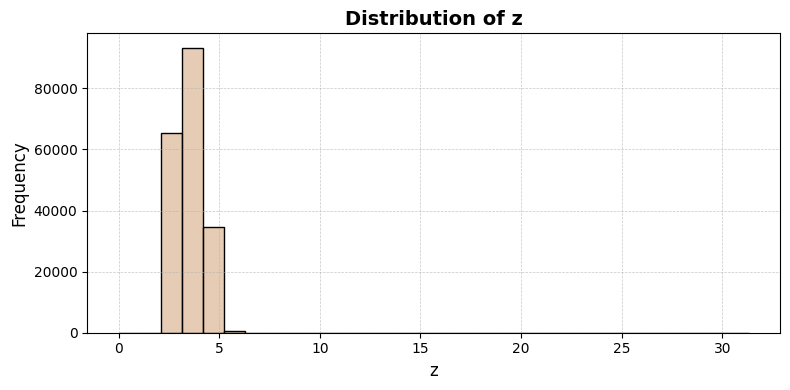

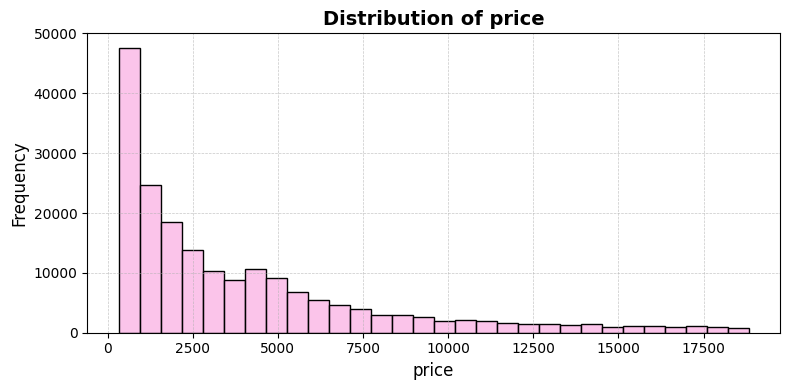

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

pastel_colors = sns.color_palette("pastel", len(numerical_columns))

for idx, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=False, bins=30, color=pastel_colors[idx])
    plt.title(f'Distribution of {col}', fontsize = 14, fontweight = 'bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    print('\n')

### Data Distribution of Categorical Columns

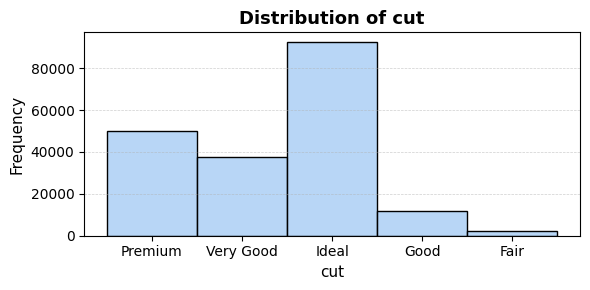

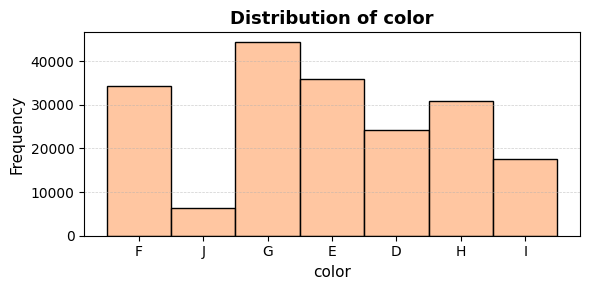

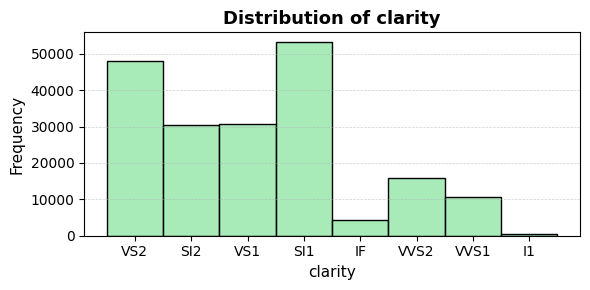

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

pastel_colors = sns.color_palette("pastel", len(categorical_columns))

for idx, col in enumerate(categorical_columns):
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, color=pastel_colors[idx])
    plt.title(f'Distribution of {col}', fontsize = 13, fontweight = 'bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()
    print('\n')

### Correlation Matrix: To check correlations between numerical columns

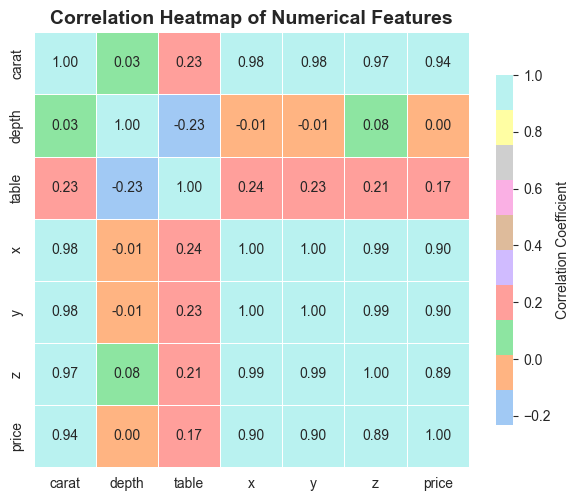

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(6,5))
sns.heatmap(
    df[numerical_columns].corr(),
    annot=True,
    fmt='.2f',
    cmap=sns.color_palette("pastel", as_cmap=True),
    linewidth=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}

)

plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

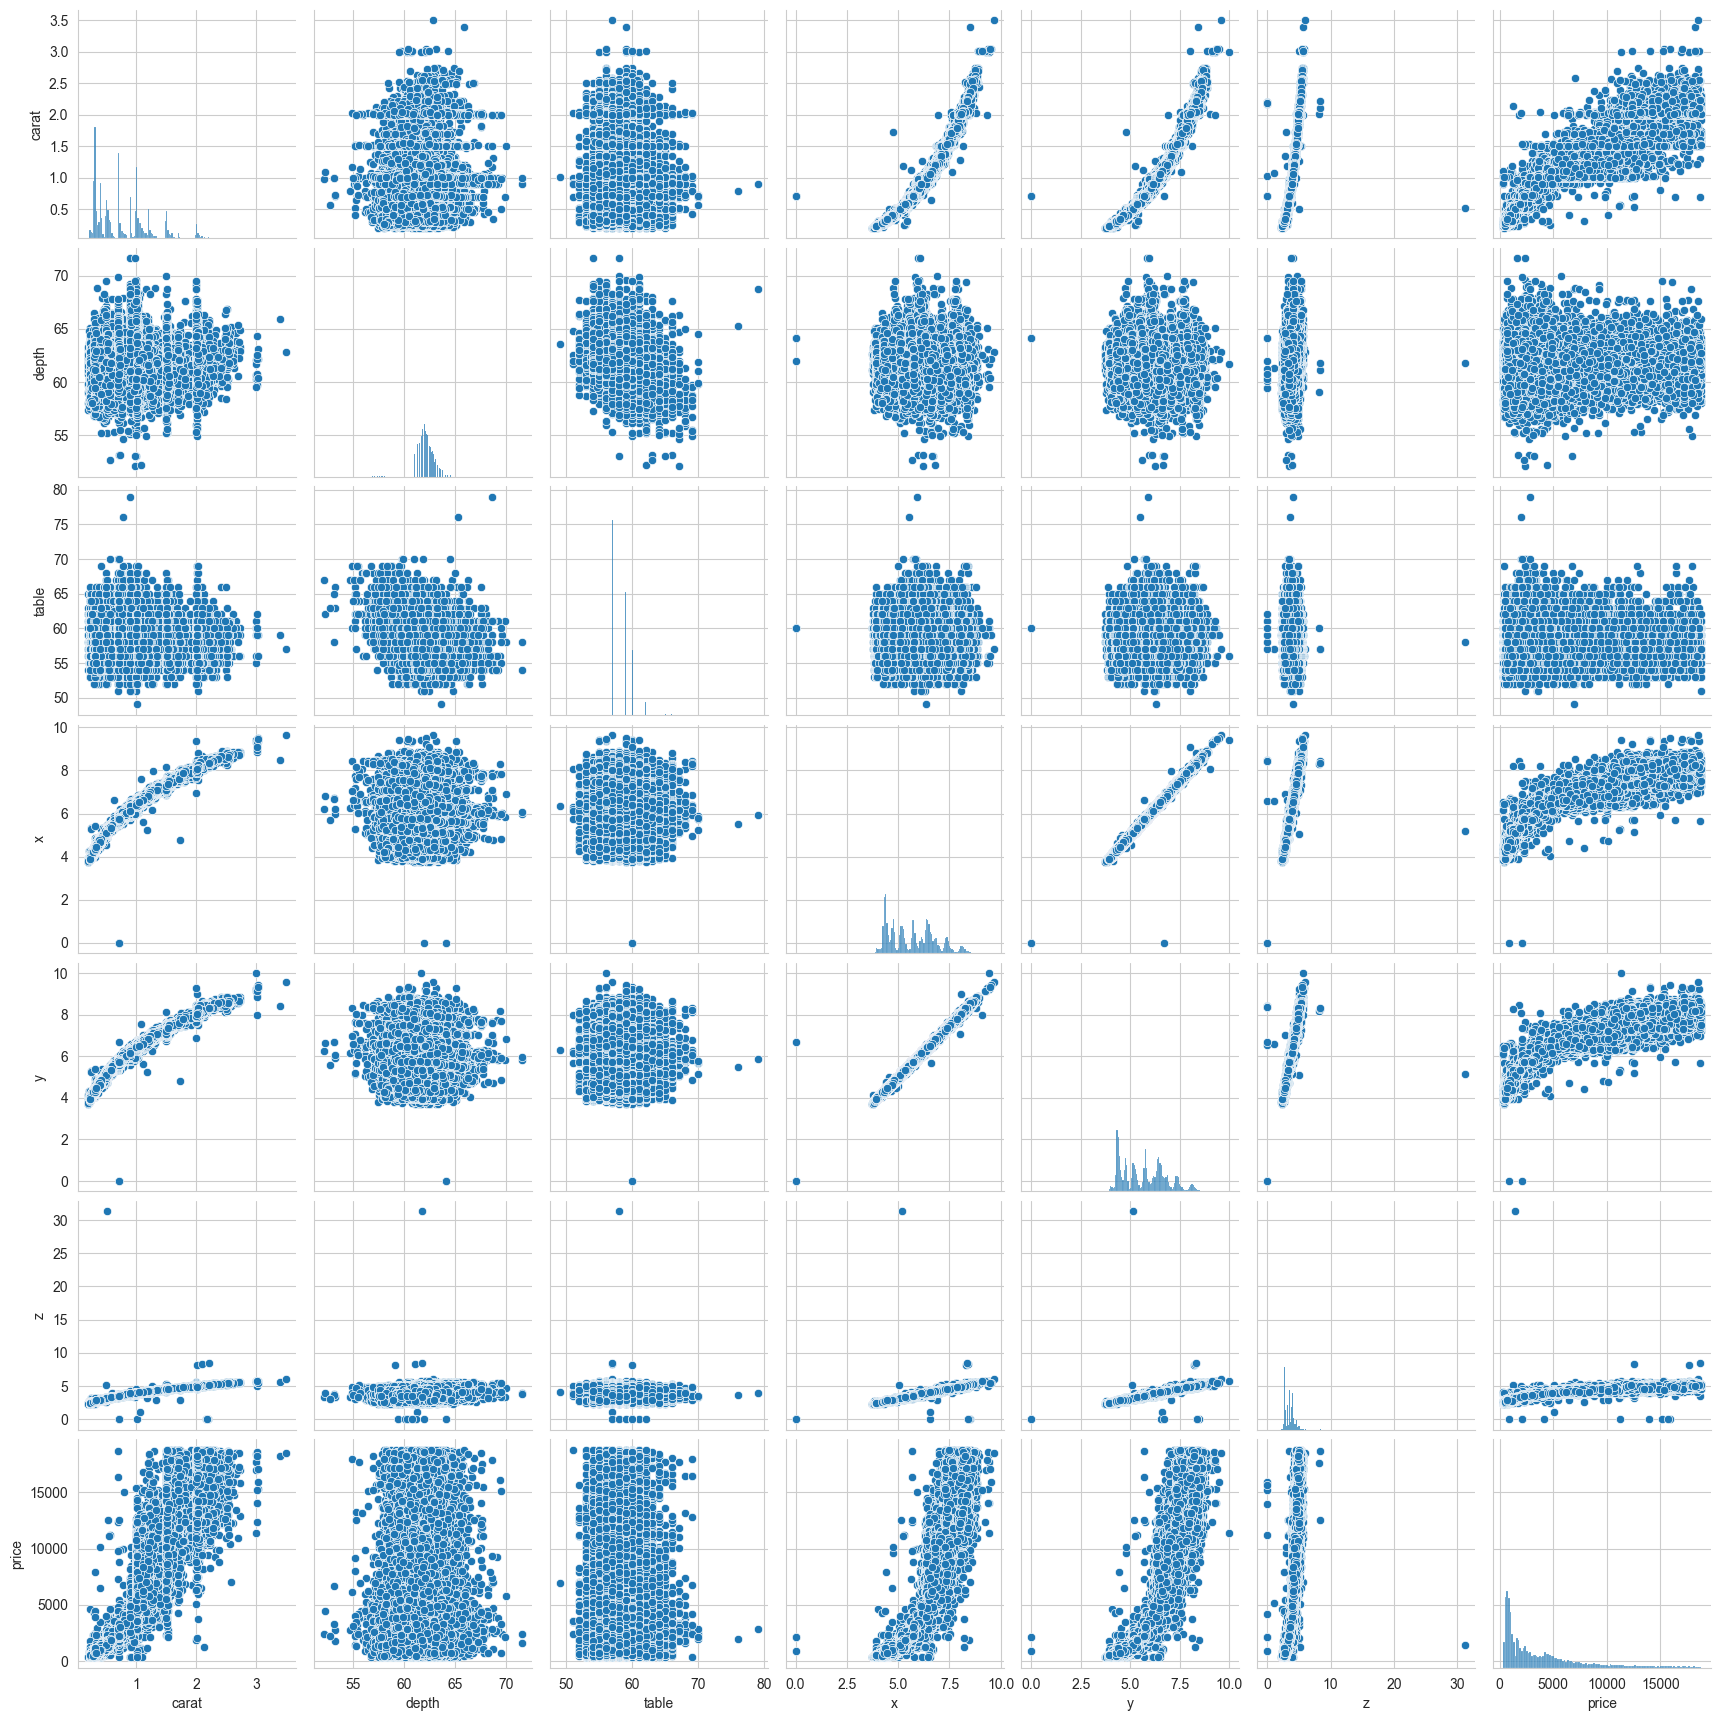

In [23]:
sns.pairplot(df)

### Inferences

- A very clear strong positive linear relationship. As carat increases, price increases substantially. Carat appears to be the most important feature affecting diamond price.

- x, y, z also shpw a positive linear trend with price, but with more spread than carat. However, since x, y and z are strongly correlated with each other, they may introduce multicollinearity if used together in regression. Including all three in a regression model may lead to multicollinearity so it's better to combine them into a single feature (like volume = x * y * z)

- Depth and Table show no strong linear relationship with price. The scatter plots are diffuse, indicating that depth and table might not be very influential for predicting price. Including them might introduce noise unless their effect is nonlinear or interacts with other variables

### Checking for Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]

X_const = add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

  Feature          VIF
0   const  8602.170267
1   carat    27.123337
2   depth     1.848441
3   table     1.134979
4       x   609.387305
5       y   586.585542
6       z    86.478892


In [25]:
df['volume'] = df['x'] * df['y'] * df['z']  #Feature Engineering: Feature Creation

In [33]:
df = df.drop(['x', 'y', 'z'], axis=1)

In [28]:
X = df[['carat', 'depth', 'table', 'volume']]

X_const= add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

  Feature          VIF
0   const  5964.217748
1   carat   404.348096
2   depth     1.159390
3   table     1.178355
4  volume   401.870002


In [29]:
df = df.drop(['volume'], axis=1)

In [30]:
X = df[['carat', 'depth', 'table']]

X_const= add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

  Feature          VIF
0   const  5335.987531
1   carat     1.061235
2   depth     1.063739
3   table     1.119985


### Detection and Removal of Outliers

In [34]:
df.shape

(193573, 7)

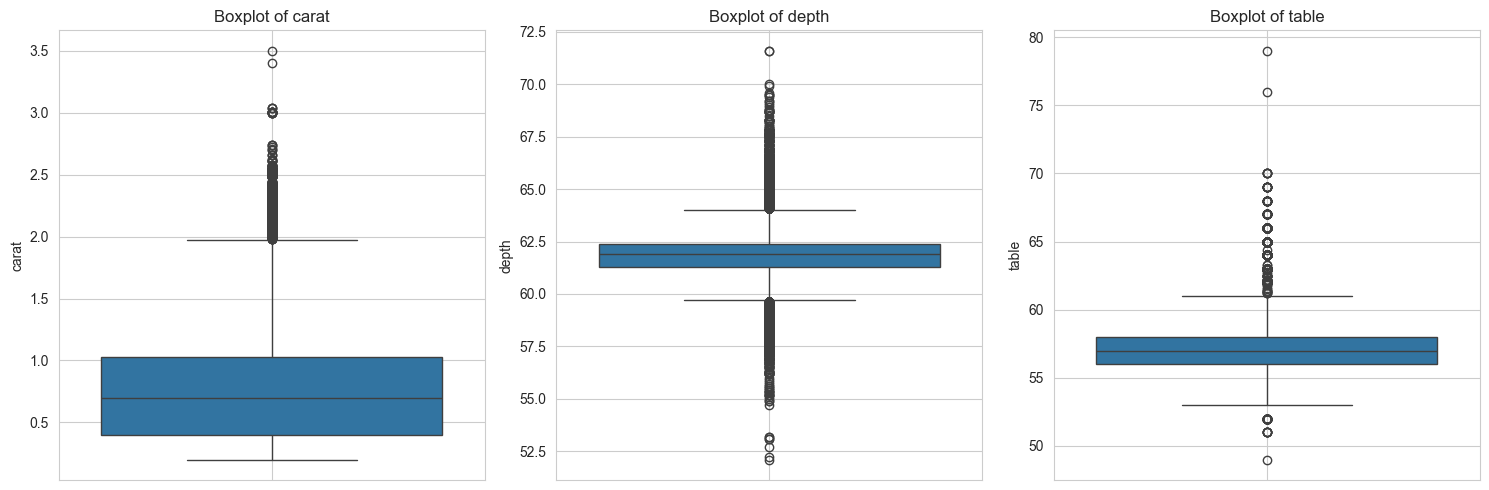

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_check = ['carat', 'depth', 'table']

plt.figure(figsize=(15,5))

for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)


plt.tight_layout()
plt.show()

In [36]:
def remove_outliers_manual(df):
    return df[
        (df['carat'] >= 0.2) & (df['carat'] <=3.0) &
        (df['depth'] >= 55) & (df['depth'] <=70) &
        (df['table'] >= 53) & (df['table'] <=65)
    ]

df = remove_outliers_manual(df)

In [ ]:
# def remove_outliers_iqr(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
#         df = df[(df[col] >= lower) & (df[col] <= upper)]
#     return df

# columns_to_check = ['carat', 'depth', 'table']
# df = remove_outliers_iqr(df, columns_to_check)

In [37]:
df.shape

(193313, 7)

### Segregating the independent and dependent features

In [38]:
X = df.drop(labels='price', axis=1)
Y = df['price']
print(X)
print(Y)

        carat        cut color clarity  depth  table
0        1.52    Premium     F     VS2   62.2   58.0
1        2.03  Very Good     J     SI2   62.0   58.0
2        0.70      Ideal     G     VS1   61.2   57.0
3        0.32      Ideal     G     VS1   61.6   56.0
4        1.70    Premium     G     VS2   62.6   59.0
...       ...        ...   ...     ...    ...    ...
193568   0.31      Ideal     D    VVS2   61.1   56.0
193569   0.70    Premium     G    VVS2   60.3   58.0
193570   0.73  Very Good     F     SI1   63.1   57.0
193571   0.34  Very Good     D     SI1   62.9   55.0
193572   0.71       Good     E     SI2   60.8   64.0

[193313 rows x 6 columns]
0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193313, dtype: int64


### Categorizing only the independent columns into numerical and categorical columns

In [39]:
categorical_columns = X.select_dtypes(include = 'object').columns
numerical_columns = X.select_dtypes(exclude = 'object').columns

In [40]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

### We need simple imputer to fill the missing values and standard scaler to do feature scaling of numerical values

### Although there are no missing values in the dataset but future data might contain missing values so it is a good practice to build the pipeline accordingly

In [41]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Creating Numerical and Categorical Pipeline

In [42]:
num_pipe = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

cat_pipe = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])),
        ('scaler', StandardScaler())
    ]
)

In [43]:
num_pipe

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [44]:
cat_pipe

,steps,"[('imputer', ...), ('ordinalencoder', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['Fair', 'Good', ...], ['J', 'I', ...], ...]"


### Combining both the pipelines

In [45]:
preprocessor = ColumnTransformer([
    ('num_pipe', num_pipe, numerical_columns),
    ('cat_pipe', cat_pipe, categorical_columns)
])

In [46]:
preprocessor

,transformers,"[('num_pipe', ...), ('cat_pipe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


### Train and Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 45)

In [48]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [49]:
X_train.head()

,num_pipe__carat,num_pipe__depth,num_pipe__table,cat_pipe__cut,cat_pipe__color,cat_pipe__clarity
0,1.554890,0.907600,-0.115485,-1.147018,-2.147247,1.349404
1,2.657353,-1.788723,0.943145,0.872034,-2.147247,-0.649683
2,-1.017525,-0.115143,-1.703431,0.872034,1.549893,0.016679
3,-0.822972,1.279506,0.413830,-1.147018,0.933703,0.683041
4,0.236257,1.093553,0.943145,-1.147018,-0.298677,0.016679


In [50]:
X_test.head()

,num_pipe__carat,num_pipe__depth,num_pipe__table,cat_pipe__cut,cat_pipe__color,cat_pipe__clarity
0,0.560511,-1.881700,0.943145,-0.137492,-0.914867,-0.649683
1,-0.844589,-0.115143,-1.703431,0.872034,-1.531057,-1.316045
2,-0.995908,-1.137887,2.001776,-1.147018,1.549893,0.016679
3,0.236257,0.628670,-0.644801,0.872034,0.317513,-0.649683
4,-0.779739,-0.765980,-0.115485,-0.137492,0.933703,-1.316045


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
regression = LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
regression.coef_

array([4229.53375825,  -45.87592806,  -69.59496089,   76.77640449,
        443.99199091,  739.22192956])

In [54]:
regression.intercept_

np.float64(3973.570945759536)

In [55]:
import numpy as np
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [57]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}
model_list=[]
r2_list=[]
 
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
 
    #Make Predictions
    y_pred=model.predict(X_test)
 
    mae, mse, rmse, r2_square=model_evaluation(y_test,y_pred)
 
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
   
 
    print('Model Training Performance')
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:",rmse)
    print("R2 score",r2_square*100)
 
    r2_list.append(r2_square)
   
    print('*'*35)
    print('\n')

LinearRegression
Model Training Performance
MAE: 810.5211837634172
MSE: 1202712.598618803
RMSE: 1096.682542315142
R2 score 92.50115420377156
***********************************


DecisionTree
Model Training Performance
MAE: 421.3156885415977
MSE: 690212.4899523329
RMSE: 830.7902803670328
R2 score 95.69656372210011
***********************************


RandomForest
Model Training Performance
MAE: 330.1806332217503
MSE: 400393.92234709376
RMSE: 632.766878358131
R2 score 97.50356628435091
***********************************


XGBoost
Model Training Performance
MAE: 300.27374267578125
MSE: 335500.65625
RMSE: 579.2241847937636
R2 score 97.90817499160767
***********************************


